**Here we implement the best model estimated by AutoML()**

In [2]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("customer_feedback_satisfaction.csv")

In [4]:
#Setting CustomerID as index
df.set_index("CustomerID", inplace=True)

In [7]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [8]:
Y=df['SatisfactionScore']
X=df.drop(columns=['SatisfactionScore'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [25]:
cat_features = ['Gender', 'Country','FeedbackScore', 'LoyaltyLevel']
model=CatBoostRegressor(verbose=100,learning_rate=0.05)
model.fit(X_train, y_train, cat_features=cat_features)

y_pred = model.predict(X_test)

0:	learn: 16.3838588	total: 7.84ms	remaining: 7.83s
100:	learn: 7.6927544	total: 678ms	remaining: 6.03s
200:	learn: 7.6165401	total: 1.26s	remaining: 5.01s
300:	learn: 7.5810979	total: 1.76s	remaining: 4.1s
400:	learn: 7.5480512	total: 2.27s	remaining: 3.39s
500:	learn: 7.5213013	total: 2.79s	remaining: 2.77s
600:	learn: 7.4932344	total: 3.35s	remaining: 2.22s
700:	learn: 7.4679744	total: 3.89s	remaining: 1.66s
800:	learn: 7.4403259	total: 4.43s	remaining: 1.1s
900:	learn: 7.4203636	total: 4.95s	remaining: 544ms
999:	learn: 7.3973929	total: 5.49s	remaining: 0us


In [26]:
from sklearn.metrics import r2_score, root_mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.7978634272632856
RMSE: 7.535935312597142


In [27]:
threshold = 7.5
custom_accuracy = (abs(y_test - y_pred) <= threshold).mean() * 100
print(f"Custom Accuracy within ±{threshold}: {custom_accuracy:.2f}%")

Custom Accuracy within ±7.5: 72.55%


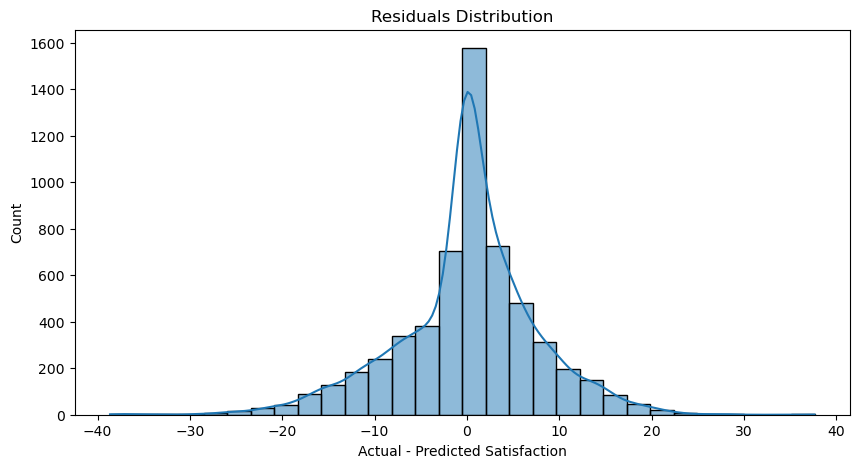

In [28]:
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Actual - Predicted Satisfaction")
plt.show()

In [32]:

importances=model.feature_importances_
features=X_train.columns
importance_df=pd.DataFrame({
      "Feature Name": features,
      "Importances":importances
}).sort_values(by="Importances", ascending=False)


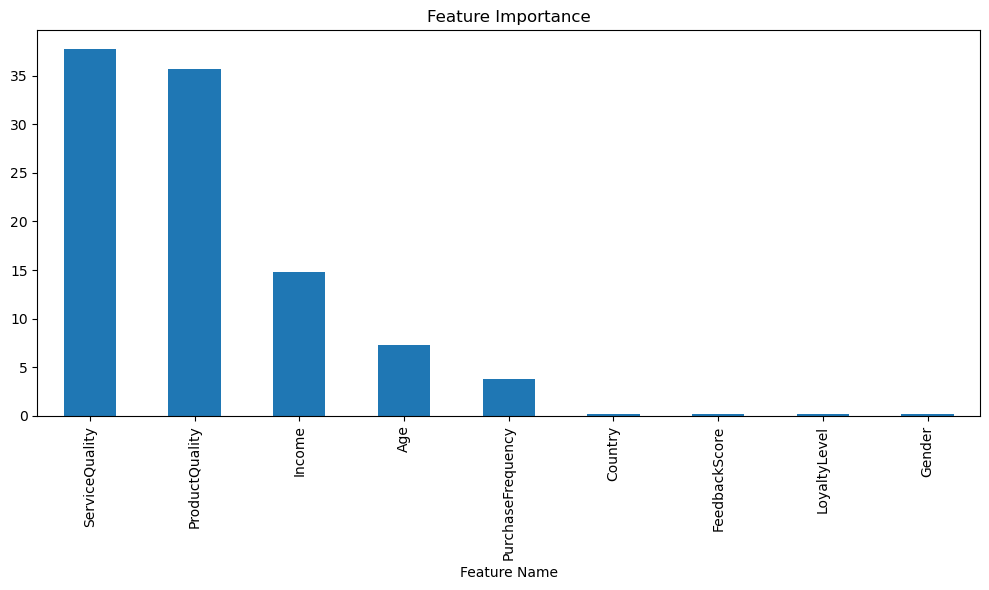

In [34]:
import matplotlib.pyplot as plt
importance_df.plot(kind='bar', x='Feature Name', y='Importances', legend=False, figsize=(10,6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()